# Comparison of Discretization Schemes for a Simple Pendulum

In this notebook, we will compare different discretization schemes for simulating a simple pendulum. We will use the following methods:
- Euler Forward
- Euler Forward with 2 steps
- Runge-Kutta 2nd order (RK2)
- Runge-Kutta 4th order (RK4)

First, we will define the pendulum model and the necessary functions for integration and simulation.

## Define the Pendulum Model

The dynamics of the simple pendulum can be described using the following differential equations:

$$
\begin{align*}
\dot{\theta} &= \theta_{dot} \\
\dot{\theta_{dot}} &= \frac{m \cdot g \cdot l \cdot \sin(\theta) + m \cdot l \cdot \cos(\theta) \cdot u}{I + m \cdot l^2}
\end{align*}
$$

Where:
- $\theta$ is the angle of the pendulum.
- $\theta_{dot}$ is the angular velocity.
- $u$ is the control input (torque).
- $m$ is the mass.
- $l$ is the length of the pendulum.
- $I$ is the moment of inertia.
- $g$ is the acceleration due to gravity.

Let's define the pendulum model in CasADi.

In [9]:
# Import necessary libraries
import casadi as ca
import numpy as np
import matplotlib.pyplot as plt

from openmpc.models import NonlinearSystem

# Define the ODE right-hand side function for the simple pendulum model
th    = ca.MX.sym("th")
thDot = ca.MX.sym("thDot")
u     = ca.MX.sym("u")  # Control input or parameter

m = 0.2
l = 0.3
I = 0.006
g = 9.81

a = m * g * l / (I + m * l**2)
b = m * l / (I + m * l**2)

rhs = ca.vertcat(
    thDot,            # dth/dt
    a * ca.sin(th) + b * ca.cos(th) * u  # dth_dot/dt
)

# Create the NonlinearSystem object
states = ca.vertcat(th, thDot)
inputs = u


## Simulation parameters

Next, we will define the simulation parameters including the time step, total simulation time, and the initial state of the pendulum.

In [10]:
# Simulation parameters
dt = 0.1  # Integration interval
Tsim = 3.0  # Total simulation time
N_steps = int(Tsim / dt)  # Number of simulation steps
initial_state = np.array([3 * np.pi / 4, 0])  # Initial state [theta, theta_dot]

## Define integration schemes

We will use the provided RK and forward_euler functions from the nonlinear_mpc package to define the different integration schemes.

In [11]:
# Define the integration schemes

rk4_system          = NonlinearSystem.c2d(rhs,states, inputs,  integrator= 'RK4'  , dt=dt)
rk2_system          = NonlinearSystem.c2d(rhs,states, inputs,  integrator= 'RK2'  , dt=dt)
euler_system        = NonlinearSystem.c2d(rhs,states, inputs,  integrator= 'Euler', dt=dt, steps=1)
euler_2steps_system = NonlinearSystem.c2d(rhs,states, inputs,  integrator= 'Euler', dt=dt, steps=2)

## Simulate the System Using Different Integrators

We will simulate the system using the different integrators and compare the results.

In [12]:
# Simulate the system using different integrators
x_euler        , y_euler        = euler_system.simulate(x0 = initial_state, steps =  N_steps)
x_rk2          , y_rk2          = rk2_system.simulate(x0 = initial_state, steps =  N_steps)
x_rk4          , y_rk4          = rk4_system.simulate(x0 = initial_state, steps =  N_steps)
x_euler_2steps , y_euler_2steps = euler_2steps_system.simulate(x0 = initial_state, steps =  N_steps)

## Plot the Results

Finally, we will plot the results of the simulations. The plots will include small squares at each sampling instant to indicate the time steps.

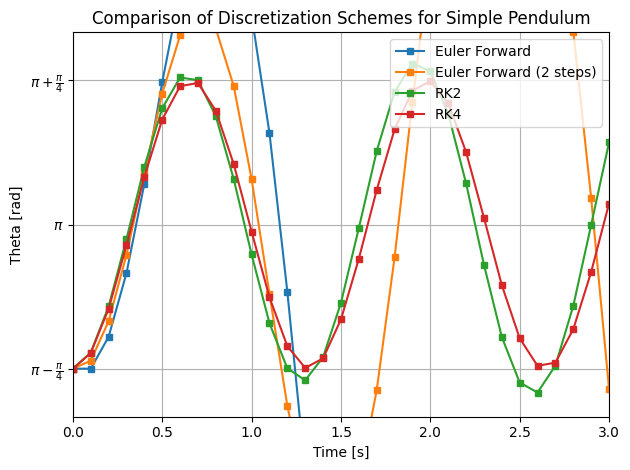

In [13]:
# Time grid for plotting
t_sim = np.linspace(0, Tsim, N_steps + 1)

# Plot the results
plt.figure()

plt.plot(t_sim, x_euler[0, :], label='Euler Forward', marker='s', markersize=4)
plt.plot(t_sim, x_euler_2steps[0, :], label='Euler Forward (2 steps)', marker='s', markersize=4)
plt.plot(t_sim, x_rk2[0, :], label='RK2', marker='s', markersize=4)
plt.plot(t_sim, x_rk4[0, :], label='RK4', marker='s', markersize=4)

plt.xlabel('Time [s]')
plt.ylabel('Theta [rad]')
plt.title('Comparison of Discretization Schemes for Simple Pendulum')
plt.legend(loc='upper right')
plt.grid(True, which='both')

# Custom Y grid lines
plt.yticks([np.pi - np.pi/4, np.pi, np.pi + np.pi/4], 
           [r'$\pi - \frac{\pi}{4}$', r'$\pi$', r'$\pi + \frac{\pi}{4}$'])

# Adjust Y limits
plt.ylim([2/3 * np.pi, 4/3 * np.pi])
plt.xlim([0, Tsim])

# Save the plot as PDF
plt.tight_layout()
plt.savefig('discretization_comparison.pdf', format='pdf')

plt.show()

In [14]:
print(x_euler[0, :])
print(x_euler_2steps[0, :])

[  2.35619449   2.35619449   2.52961243   2.8764483    3.36417771
   3.91617453   4.41403201   4.7403574    4.83226775   4.67902401
   4.2822904    3.64044329   2.7756824    1.79358985   0.89924762
   0.24409379  -0.21906387  -0.62295023  -1.08013333  -1.68040356
  -2.49698935  -3.55735343  -4.76508367  -5.87376087  -6.73752848
  -7.50366663  -8.37743819  -9.4815644  -10.79810079 -12.10071778
 -13.16285111]
[2.35619449 2.39954897 2.61440164 2.97626651 3.42245923 3.85528486
 4.17156818 4.29971708 4.20874564 3.89645131 3.38957571 2.76445263
 2.15385202 1.69542081 1.46508715 1.47915878 1.73685953 2.23870682
 2.96272844 3.81144535 4.60385031 5.18879365 5.53848279 5.69666585
 5.70565416 5.58157273 5.31291106 4.86475538 4.19255021 3.28534541
 2.24449976]
